importing modules

In [265]:
from ydata_profiling import ProfileReport

In [266]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [268]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SVMSMOTE,SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import SVC

reading in our data

In [325]:
path="/home/alpha/Downloads/ai4i2020.csv"
data=pd.read_csv(path)
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


dropping irrelevant colummns

In [326]:
data.drop(['UDI','Product ID'],inplace=True,axis=1)

renaming our columns

In [327]:
cols={
    'Air temperature [K]':"AirTemp",
    'Process temperature [K]':"ProcessTemp",
    'Rotational speed [rpm]':'RotationSpeed',
    'Torque [Nm]':'Torque',
    'Tool wear [min]':'ToolWear',
    'Machine failure':"MachineFailure"
}
data.rename(cols,inplace=True,axis=1)

In [328]:
data.head()

,Type,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear,MachineFailure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [301]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            10000 non-null  object 
 1   AirTemp         10000 non-null  float64
 2   ProcessTemp     10000 non-null  float64
 3   RotationSpeed   10000 non-null  int64  
 4   Torque          10000 non-null  float64
 5   ToolWear        10000 non-null  int64  
 6   MachineFailure  10000 non-null  int64  
 7   TWF             10000 non-null  int64  
 8   HDF             10000 non-null  int64  
 9   PWF             10000 non-null  int64  
 10  OSF             10000 non-null  int64  
 11  RNF             10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB
None


In [302]:
print(data.isna().sum())

Type              0
AirTemp           0
ProcessTemp       0
RotationSpeed     0
Torque            0
ToolWear          0
MachineFailure    0
TWF               0
HDF               0
PWF               0
OSF               0
RNF               0
dtype: int64


In [303]:
#confirmation of no null valueds
data=data.replace("?",np.NaN)
data.isna().sum()

Type              0
AirTemp           0
ProcessTemp       0
RotationSpeed     0
Torque            0
ToolWear          0
MachineFailure    0
TWF               0
HDF               0
PWF               0
OSF               0
RNF               0
dtype: int64

from above we have no null or empty values

In [304]:
duplicates=data.duplicated().sum()
print(f"{duplicates}  duplicated rows")

0  duplicated rows


Numerical descriptive summary

In [329]:
datanumeric=data.select_dtypes(include=np.number)
datanumeric.describe().T

,count,mean,std,min,25%,50%,75%,max
AirTemp,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
ProcessTemp,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
RotationSpeed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
ToolWear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
MachineFailure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


convert all numeric dtpes to float

In [330]:
for col in data.columns:
    try:
        data[col]=data[col].astype(float)
    except:
        pass
data.dtypes

Type               object
AirTemp           float64
ProcessTemp       float64
RotationSpeed     float64
Torque            float64
ToolWear          float64
MachineFailure    float64
TWF               float64
HDF               float64
PWF               float64
OSF               float64
RNF               float64
dtype: object

checking our target column

In [331]:
data['MachineFailure'].value_counts()

MachineFailure
0.0    9661
1.0     339
Name: count, dtype: int64

<Axes: xlabel='MachineFailure', ylabel='count'>

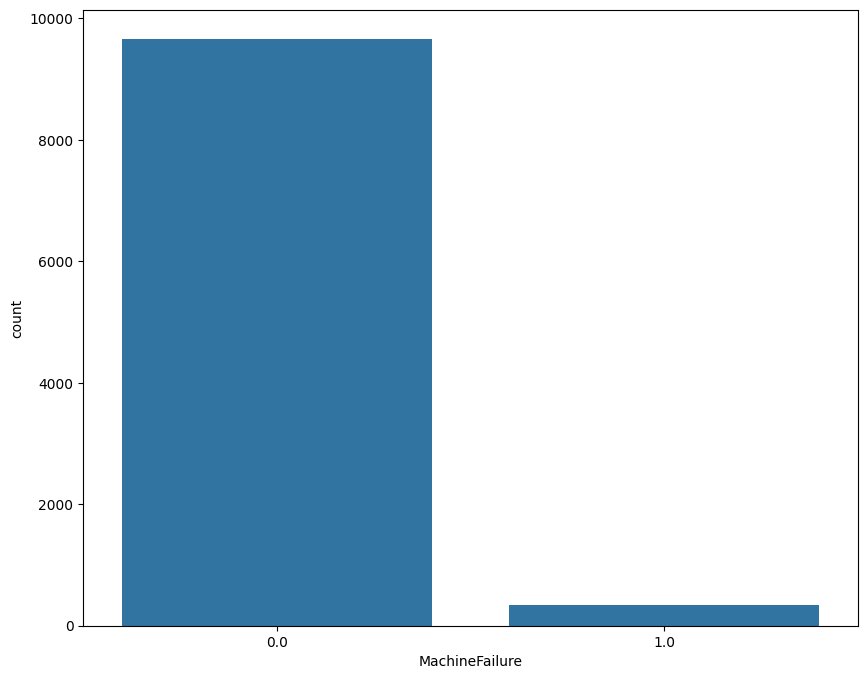

In [281]:
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data,x="MachineFailure",ax=ax)

we have an inbalanced targget column
apply SMOTE

machine failures by type(L,M,H)

<Axes: xlabel='Type', ylabel='MachineFailure'>

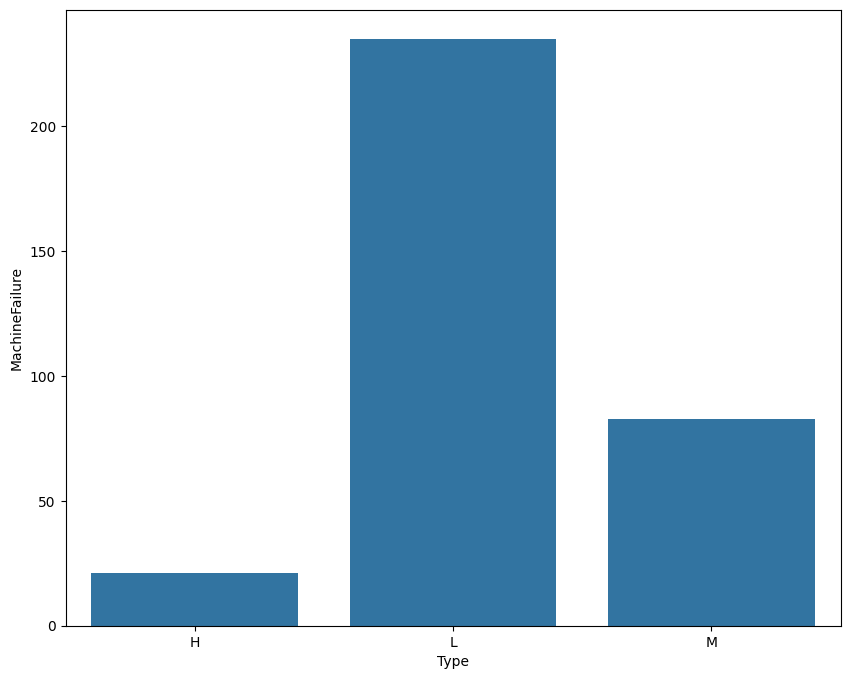

In [282]:
types=data.groupby("Type")["MachineFailure"].sum()
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(types,ax=ax)

In [333]:
datanumeric.drop(failures,axis=1,inplace=True)

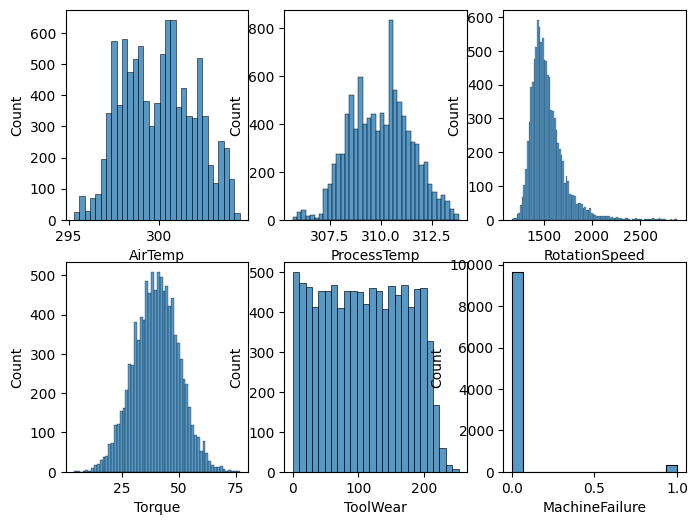

In [334]:
fig,ax=plt.subplots(2,3,figsize=(8,6))
for i,col in enumerate(datanumeric.columns):
    sns.histplot(datanumeric[col],ax=ax[i//3][i%3])

    

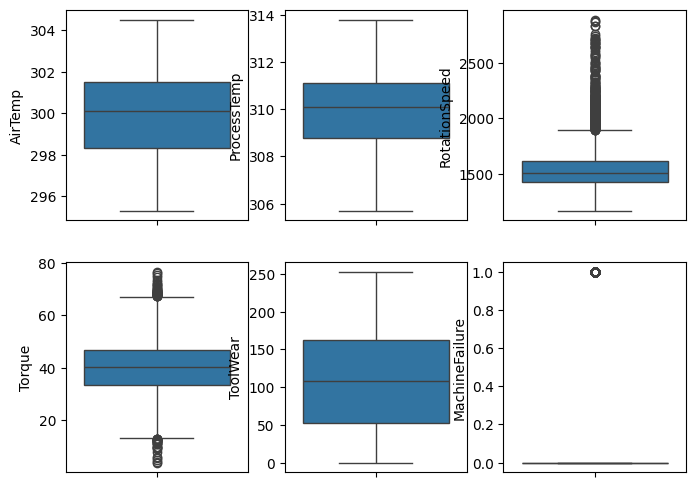

In [335]:
fig,axes=plt.subplots(2,3,figsize=(8,6))
for i,col in enumerate(datanumeric.columns):
    sns.boxplot(datanumeric,y=col,ax=axes[i//3][i%3])

boxplot with respect to machine failure

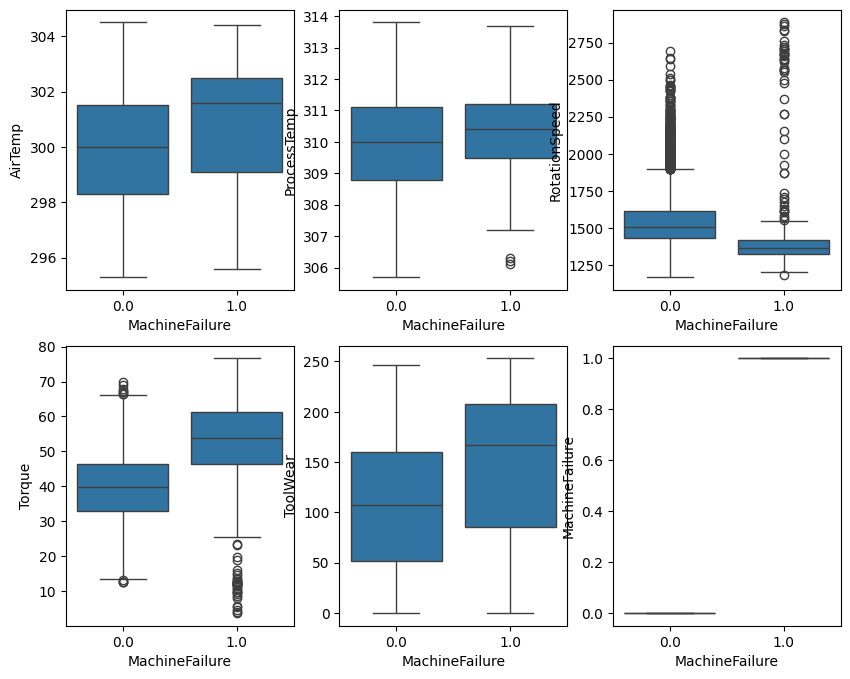

In [315]:
fig,axes=plt.subplots(2,3,figsize=(10,8))
for i,col in enumerate(datanumeric.columns):
    sns.boxplot(data,x='MachineFailure',y=col,ax=axes[i//3][i%3])

pairplots among features

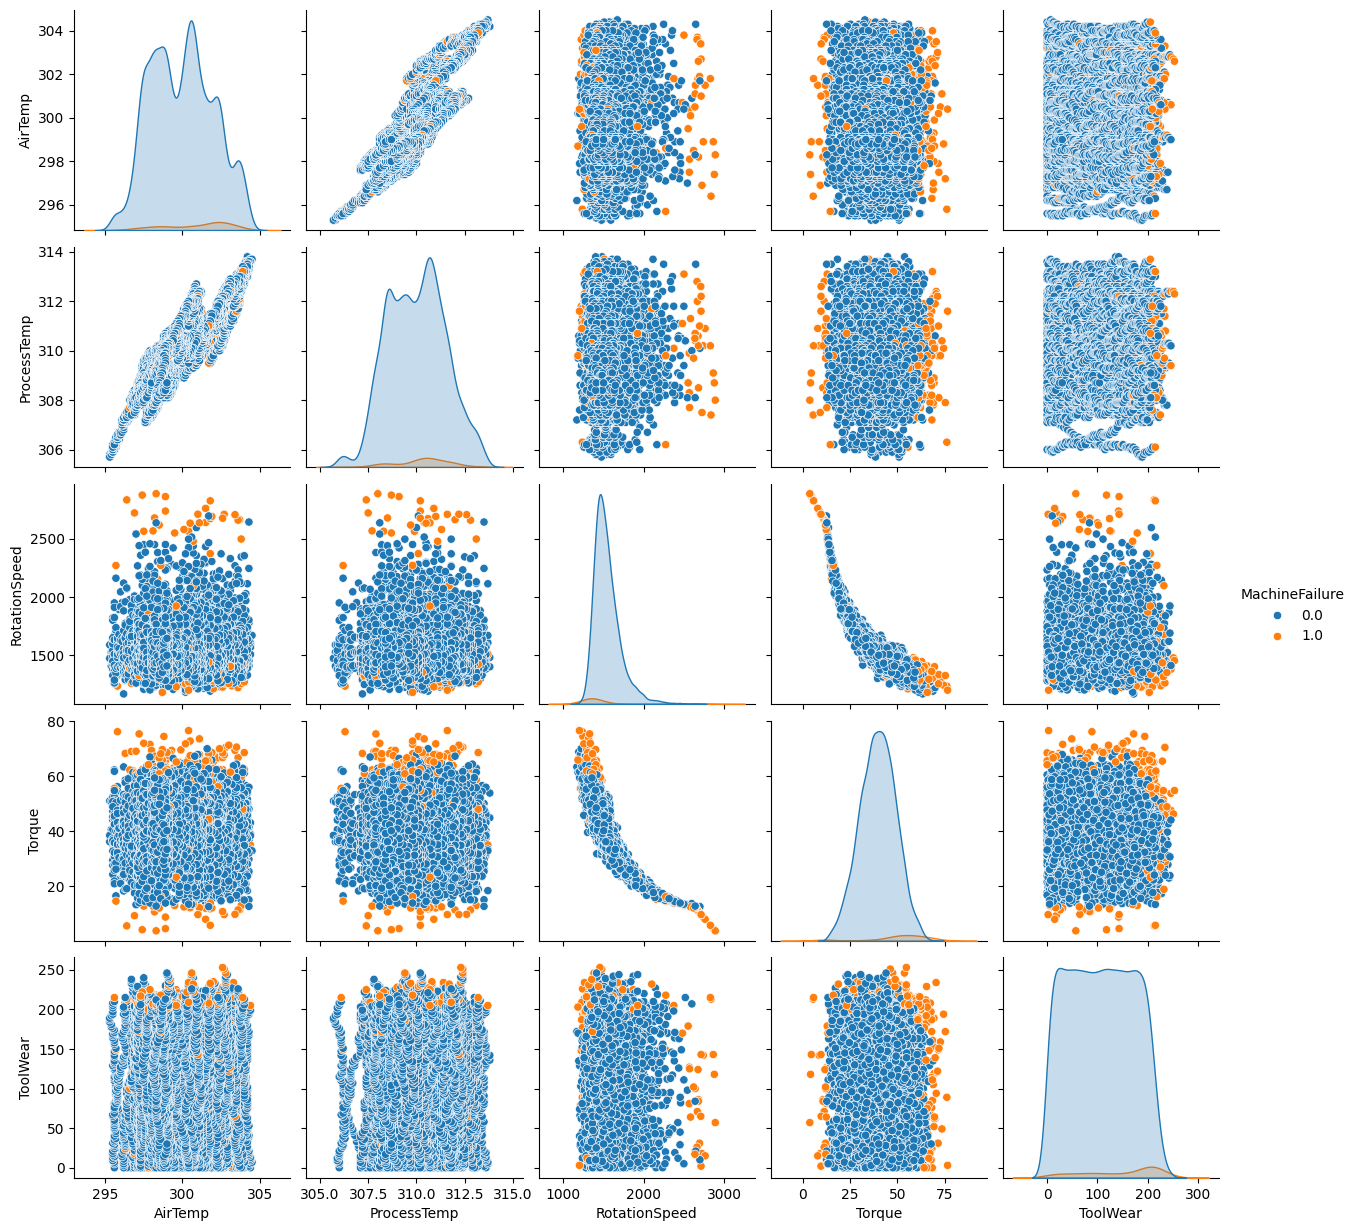

In [316]:
sns.pairplot(data, hue='MachineFailure')

correlation

<Axes: >

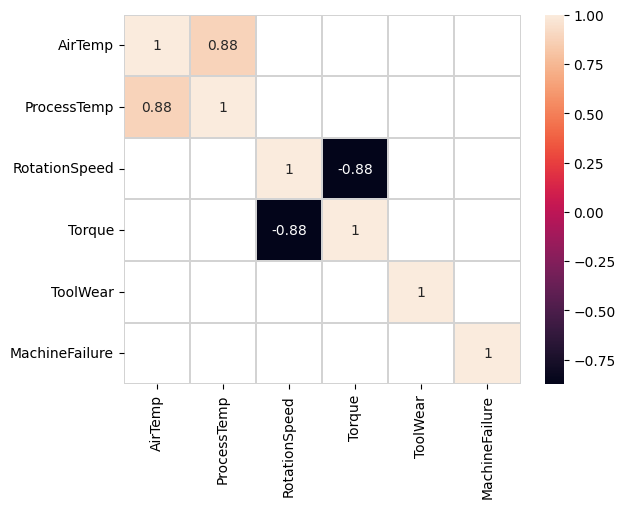

In [336]:
cor=datanumeric.corr()
threshold=0.3
mask=np.where(np.abs(cor)>=threshold,False,True)
sns.heatmap(cor,annot=True,mask=mask,linewidth=0.3,linecolor='lightgrey',)

PROFILE REPORT

In [338]:
data1=data.copy()

In [347]:
data1.drop(failures,axis=1,inplace=True)

In [348]:
report=ProfileReport(
    data1,
    title="Profile Report",
    dataset={
        "author":"Mark Ndung'u Njuguna",
    }
)

In [349]:
report.to_file('report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

DATA PREPROCESSING:One hot encoding

In [339]:
encoder=OneHotEncoder()
types=pd.DataFrame(encoder.fit_transform(np.array(data['Type']).reshape(-1,1)).toarray())
header=encoder.get_feature_names_out()
types.columns=header
data=pd.concat([data,types],axis=1)
data.drop("Type",axis=1,inplace=True)
categories=np.array(encoder.categories_).ravel()
data

,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear,MachineFailure,TWF,HDF,PWF,OSF,RNF,x0_H,x0_L,x0_M
0,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9996,298.9,308.4,1632.0,31.8,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,299.0,308.6,1645.0,33.4,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,299.0,308.7,1408.0,48.5,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


del redundant rows

In [ ]:
poor=data.loc[(data['MachineFailure']==1) & 
((data['TWF']==0)&(data['HDF']==0 )&(data['PWF']==0 )&(data['OSF']==0 )&(data['RNF']==0 ))]

In [ ]:
poor=data.loc[(data['MachineFailure']==1) & 
((data['TWF']==0)&(data['HDF']==0 )&(data['PWF']==0 )&(data['OSF']==0 )&(data['RNF']==0 ))]
data.drop(poor.index,inplace=True)

In [ ]:
data.loc[(data['MachineFailure']==0) & 
((data['TWF']==1)|(data['HDF']==1 )|(data['PWF']==1 )|(data['OSF']==1 )|(data['RNF']==1))]

In [ ]:
poor=data.loc[(data['MachineFailure']==0) & 
((data['TWF']==1)|(data['HDF']==1 )|(data['PWF']==1 )|(data['OSF']==1 )|(data['RNF']==1)),"MachineFailure"]=1

In [352]:
data['MachineFailure'].value_counts()

MachineFailure
0.0    9643
1.0     348
Name: count, dtype: int64

del failure types columns

In [343]:
failures=['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
data.drop(failures,axis=1,inplace=True)


splitting our data into train and test data

In [354]:
data

,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear,MachineFailure,x0_H,x0_L,x0_M
0,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,1.0
1,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,1.0,0.0
2,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,1.0,0.0
3,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,1.0,0.0
4,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14.0,0.0,0.0,0.0,1.0
9996,298.9,308.4,1632.0,31.8,17.0,0.0,1.0,0.0,0.0
9997,299.0,308.6,1645.0,33.4,22.0,0.0,0.0,0.0,1.0
9998,299.0,308.7,1408.0,48.5,25.0,0.0,1.0,0.0,0.0


In [355]:
x=data.drop('MachineFailure',axis=1)
y=data['MachineFailure']
scaler=StandardScaler()
scaled=scaler.fit_transform(x)
xscaled=pd.DataFrame(scaled,columns=x.columns)
xscaled

,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear,x0_H,x0_L,x0_M
0,-0.952222,-0.947078,0.068015,0.282351,-1.695786,-0.333871,-1.225102,1.529092
1,-0.902227,-0.879689,-0.729478,0.633456,-1.648656,-0.333871,0.816258,-0.653983
2,-0.952222,-1.014468,-0.227559,0.944434,-1.617236,-0.333871,0.816258,-0.653983
3,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816,-0.333871,0.816258,-0.653983
4,-0.902227,-0.879689,-0.729478,0.001467,-1.554395,-0.333871,0.816258,-0.653983
...,...,...,...,...,...,...,...,...
9986,-0.602257,-1.081857,0.363589,-1.051848,-1.475845,-0.333871,-1.225102,1.529092
9987,-0.552262,-1.081857,0.519741,-0.821122,-1.428715,2.995172,-1.225102,-0.653983
9988,-0.502267,-0.947078,0.592241,-0.660617,-1.350165,-0.333871,-1.225102,1.529092
9989,-0.502267,-0.879689,-0.729478,0.854150,-1.303034,2.995172,-1.225102,-0.653983


In [356]:
xtrain,xtest,ytrain,ytest=train_test_split(xscaled,y,random_state=40,stratify=y,test_size=0.2)

Applying SMOTE

In [357]:
ytrain.value_counts()

MachineFailure
0.0    7714
1.0     278
Name: count, dtype: int64

In [358]:
xtrain.shape

(7992, 8)

In [359]:
oversampler=SVMSMOTE(random_state=40)
xtrain,ytrain=oversampler.fit_resample(xtrain,ytrain)

In [360]:
ytrain.value_counts()

MachineFailure
0.0    7714
1.0    7714
Name: count, dtype: int64

In [361]:
xtrain

,AirTemp,ProcessTemp,RotationSpeed,Torque,ToolWear,x0_H,x0_L,x0_M
0,2.097474,2.220217,-0.417173,0.593330,-0.941703,-0.333871,0.816258,-0.653983
1,-0.602257,-0.812300,-0.545441,0.051625,-0.706052,-0.333871,-1.225102,1.529092
2,-1.052212,-1.081857,0.547626,-0.550269,1.304836,2.995172,-1.225102,-0.653983
3,1.097573,1.074599,-0.026792,-0.279417,-1.051673,2.995172,-1.225102,-0.653983
4,0.097673,0.939821,0.173975,-0.470017,0.472203,-0.333871,-1.225102,1.529092
...,...,...,...,...,...,...,...,...
15423,0.071160,0.646439,-1.597526,3.267758,0.481165,-0.333871,0.816258,-0.653983
15424,-0.228049,0.802331,-0.883094,1.276687,1.775190,-0.333871,0.816258,-0.653983
15425,1.616647,0.928365,-1.708595,1.459255,1.866707,-0.333871,0.816258,-0.653983
15426,0.303942,1.285243,-0.927439,2.045571,1.676244,-0.333871,0.816258,-0.653983


MODEL CREATION

function to evaluate performance metrics

In [362]:
model_stats=pd.DataFrame(columns=['accuracy','precision','recall','f1_score'])
def performer(model,ytest,ypred):
    accuracy=accuracy_score(ytest,ypred)
    precision = precision_score(ytest, ypred, average='weighted')
    recall = recall_score(ytest, ypred, average='weighted')
    f1 = f1_score(ytest, ypred, average='weighted')
    model_stats.loc[model]=[accuracy,precision,recall,f1]

DECISION TREE

In [363]:
model=DecisionTreeClassifier()
params={"max_depth":[5,6,7,8]}
modelcv=GridSearchCV(model,params,cv=5)
modelcv.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8]})

In [364]:
results=pd.DataFrame(modelcv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.084259,0.010557,0.008762,0.001135,5,{'max_depth': 5},0.934219,0.926766,0.971808,0.970827,0.970502,0.954824,0.020011,4
1,0.081483,0.000658,0.007904,0.000152,6,{'max_depth': 6},0.942320,0.944913,0.976345,0.976337,0.978930,0.963769,0.016502,3
2,0.092797,0.003375,0.008086,0.000158,7,{'max_depth': 7},0.944913,0.945237,0.976021,0.980227,0.980875,0.965454,0.016724,2
3,0.099397,0.002043,0.008900,0.002033,8,{'max_depth': 8},0.950097,0.961763,0.979261,0.978606,0.981199,0.970185,0.012240,1


In [365]:
model=DecisionTreeClassifier(max_depth=8)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
performer(model,ytest,ypred)

In [366]:
model_stats

,accuracy,precision,recall,f1_score
DecisionTreeClassifier(max_depth=8),0.96098,0.975186,0.96098,0.966134


In [367]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1929
         1.0       0.47      0.83      0.60        70

    accuracy                           0.96      1999
   macro avg       0.73      0.90      0.79      1999
weighted avg       0.98      0.96      0.97      1999



KNN MODEL

In [368]:
model=KNeighborsClassifier()
params={"n_neighbors":range(2,10)}
modelcv=GridSearchCV(model,params,cv=5)
modelcv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 10)})

In [369]:
modelcv.best_params_

{'n_neighbors': 2}

In [370]:
results=pd.DataFrame(modelcv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037134,0.001659,0.756021,0.056317,2,{'n_neighbors': 2},0.962411,0.981854,0.988010,0.987358,0.991896,0.982306,0.010450,1
1,0.035536,0.000529,0.757223,0.047778,3,{'n_neighbors': 3},0.967272,0.981529,0.978937,0.982172,0.983468,0.978676,0.005890,2
2,0.035392,0.000535,0.740289,0.008258,4,{'n_neighbors': 4},0.963383,0.979909,0.981529,0.983793,0.984441,0.978611,0.007784,3
3,0.035016,0.000151,0.751525,0.003890,5,{'n_neighbors': 5},0.960143,0.977641,0.975697,0.977958,0.980875,0.974463,0.007349,5
4,0.035425,0.000713,0.757874,0.004116,6,{'n_neighbors': 6},0.960467,0.976993,0.978289,0.980551,0.983468,0.975954,0.008050,4
5,0.035354,0.000729,0.771087,0.007009,7,{'n_neighbors': 7},0.957874,0.974725,0.974076,0.975041,0.977634,0.971870,0.007102,7
6,0.035021,0.000232,0.778579,0.010610,8,{'n_neighbors': 8},0.956578,0.974076,0.975373,0.977634,0.979254,0.972583,0.008200,6
7,0.034897,0.000086,0.781910,0.005004,9,{'n_neighbors': 9},0.955282,0.972132,0.971808,0.973096,0.976985,0.969861,0.007520,8


In [371]:
model=KNeighborsClassifier(n_neighbors=2)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
performer(model,ytest,ypred)

In [372]:
model_stats

,accuracy,precision,recall,f1_score
DecisionTreeClassifier(max_depth=8),0.960980,0.975186,0.960980,0.966134
KNeighborsClassifier(n_neighbors=2),0.965983,0.967396,0.965983,0.966655


In [373]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1929
         1.0       0.51      0.56      0.53        70

    accuracy                           0.97      1999
   macro avg       0.75      0.77      0.76      1999
weighted avg       0.97      0.97      0.97      1999



LOGISTIC REGRESSION

In [374]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
performer(model,ytest,ypred)

In [375]:
model_stats

,accuracy,precision,recall,f1_score
DecisionTreeClassifier(max_depth=8),0.960980,0.975186,0.960980,0.966134
KNeighborsClassifier(n_neighbors=2),0.965983,0.967396,0.965983,0.966655
LogisticRegression(),0.846423,0.962414,0.846423,0.891568


In [376]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      1929
         1.0       0.16      0.80      0.27        70

    accuracy                           0.85      1999
   macro avg       0.58      0.82      0.59      1999
weighted avg       0.96      0.85      0.89      1999



LOGISTIC REGRESSIONCV

In [377]:
model=LogisticRegressionCV()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
performer(model,ytest,ypred)

In [378]:
model_stats

,accuracy,precision,recall,f1_score
DecisionTreeClassifier(max_depth=8),0.960980,0.975186,0.960980,0.966134
KNeighborsClassifier(n_neighbors=2),0.965983,0.967396,0.965983,0.966655
LogisticRegression(),0.846423,0.962414,0.846423,0.891568
LogisticRegressionCV(),0.846423,0.962414,0.846423,0.891568


In [379]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      1929
         1.0       0.16      0.80      0.27        70

    accuracy                           0.85      1999
   macro avg       0.58      0.82      0.59      1999
weighted avg       0.96      0.85      0.89      1999



In [380]:
model_stats

,accuracy,precision,recall,f1_score
DecisionTreeClassifier(max_depth=8),0.960980,0.975186,0.960980,0.966134
KNeighborsClassifier(n_neighbors=2),0.965983,0.967396,0.965983,0.966655
LogisticRegression(),0.846423,0.962414,0.846423,0.891568
LogisticRegressionCV(),0.846423,0.962414,0.846423,0.891568


MORE UPDATES